<a href="https://colab.research.google.com/github/AiswaryaSurendran99/dsmllab/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [2]:
iris=load_iris()
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [3]:
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9555555555555556


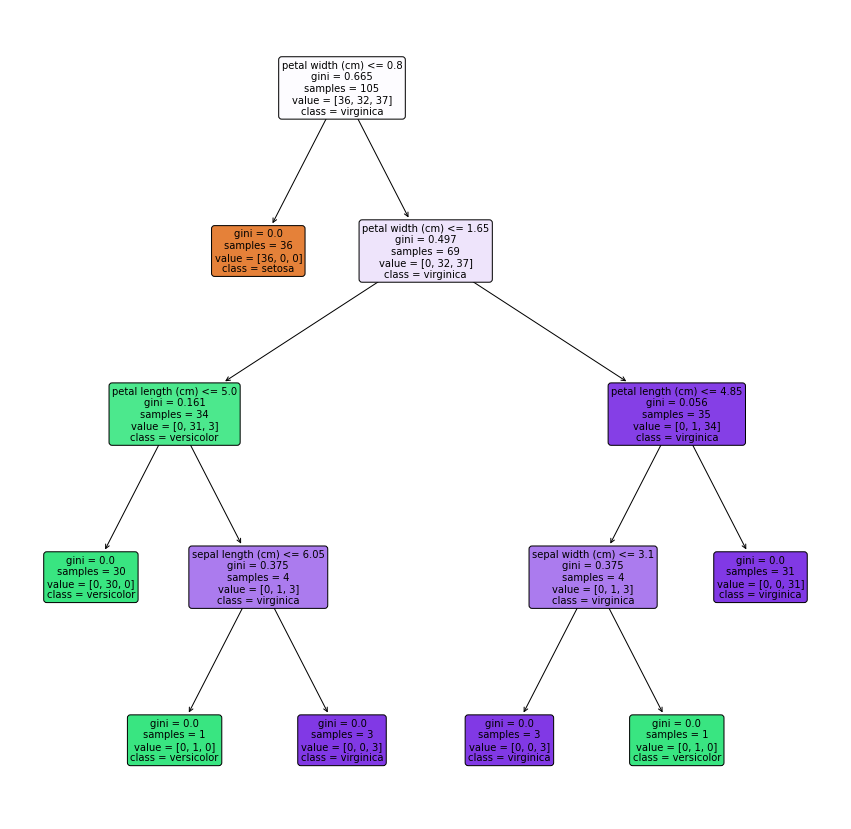

In [4]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf,fontsize=10,filled=True,rounded=True,class_names=iris.target_names,feature_names=iris.feature_names)
plt.show()

#Decision Tree2

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

#load iris data
data = load_iris()

In [6]:
data.data.shape

(150, 4)

In [7]:
print('classes to predict: ',data.target_names)
print('Features: ',data.feature_names)

classes to predict:  ['setosa' 'versicolor' 'virginica']
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
X = data.data
y = data.target

display (X.shape, y.shape)

(150, 4)

(150,)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 50, test_size = 0.25)

In [10]:
#default criterion is Gini
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy on train data using Gini: ',accuracy_score(y_true = y_train, y_pred = classifier.predict(X_train)))
print('Accuracy on test data using Gini: ',accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy on train data using Gini:  1.0
Accuracy on test data using Gini:  0.9473684210526315


In [13]:
#change criterion to entropy
classifier_entropy = DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(X_train, y_train)
y_pred_entropy = classifier_entropy.predict(X_test)
print('Accuracy on train data using entropy', accuracy_score(y_true=y_train, y_pred = classifier_entropy.predict(X_train)))
print('Accuracy on test data using entropy', accuracy_score(y_true=y_test, y_pred = y_pred_entropy))

Accuracy on train data using entropy 1.0
Accuracy on test data using entropy 0.9473684210526315


In [14]:
#change criterion to entropy with min_samples_split to 50. Default value is 2
classifier_entropy1 = DecisionTreeClassifier(criterion='entropy', min_samples_split=50)
classifier_entropy1.fit(X_train, y_train)
y_pred_entropy1 = classifier_entropy1.predict(X_test)
print('Accuracy on train data using entropy', accuracy_score(y_true=y_train, y_pred = classifier_entropy1.predict(X_train)))
print('Accuracy on test data using entropy', accuracy_score(y_true=y_test, y_pred = y_pred_entropy1))

Accuracy on train data using entropy 0.9642857142857143
Accuracy on test data using entropy 0.9473684210526315


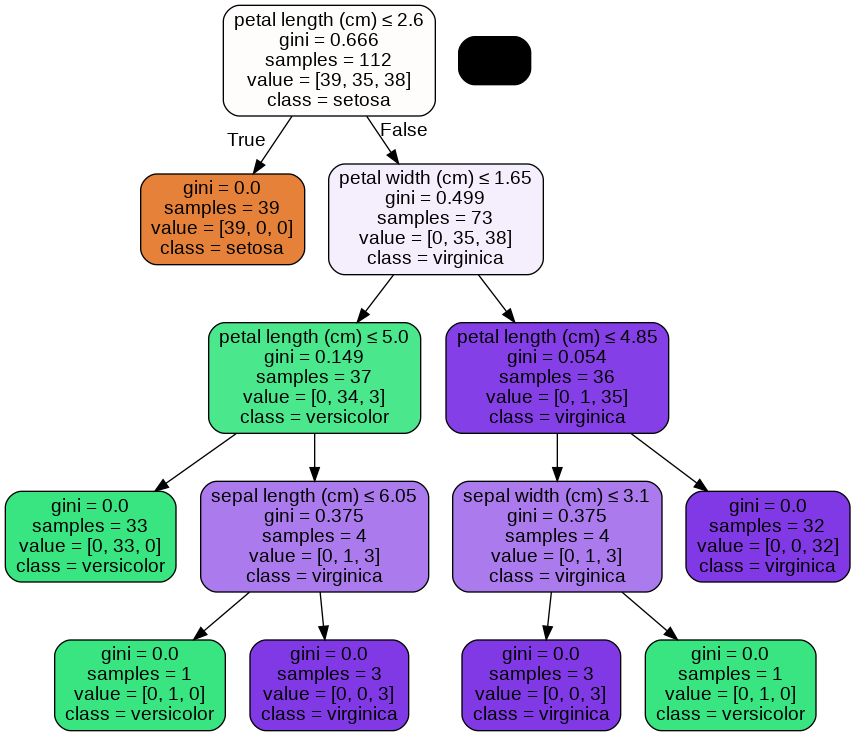

In [15]:
#visualise the decision tree

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
#the students can try using classifier, classifier_entropy and classifier_entropy1
#as first parameter below.
export_graphviz(classifier, out_file = dot_data,filled = True, rounded = True,special_characters = True, feature_names = data.feature_names, class_names = data.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())